# Data Cleaning

In this notebook I will be looking at the dataset for invalid/missing entries as well as other mistakes in the dataset and cleaning it up to prepare for machine learning.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('train.csv')
df.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [4]:
dataset_size=df.shape
print(dataset_size)

(76020, 371)


In [5]:
df.columns

Index(['ID', 'var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1',
       'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1',
       'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1',
       'imp_op_var40_efect_ult3',
       ...
       'saldo_medio_var33_hace2', 'saldo_medio_var33_hace3',
       'saldo_medio_var33_ult1', 'saldo_medio_var33_ult3',
       'saldo_medio_var44_hace2', 'saldo_medio_var44_hace3',
       'saldo_medio_var44_ult1', 'saldo_medio_var44_ult3', 'var38', 'TARGET'],
      dtype='object', length=371)

In [6]:
df_info = df.info()
df_head = df.head()

df_info, df_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


(None,
    ID  var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
 0   1     2     23                 0.0                      0.0   
 1   3     2     34                 0.0                      0.0   
 2   4     2     23                 0.0                      0.0   
 3   8     2     37                 0.0                    195.0   
 4  10     2     39                 0.0                      0.0   
 
    imp_op_var39_comer_ult3  imp_op_var40_comer_ult1  imp_op_var40_comer_ult3  \
 0                      0.0                      0.0                      0.0   
 1                      0.0                      0.0                      0.0   
 2                      0.0                      0.0                      0.0   
 3                    195.0                      0.0                      0.0   
 4                      0.0                      0.0                      0.0   
 
    imp_op_var40_efect_ult1  imp_op_var40_efect_ult3  ...  \
 0                      0.0       

In [7]:
data_types = df.dtypes

print("Data Types and Additional Information:")
for column in df.columns:
    print(f"Column: {column}")
    print(f" - Data Type: {data_types[column]}")
    print(f" - Number of Unique Values: {df[column].nunique()}")
    print(f" - Sample Values: {df[column].dropna().unique()[:5]}")  
    print()

Data Types and Additional Information:
Column: ID
 - Data Type: int64
 - Number of Unique Values: 76020
 - Sample Values: [ 1  3  4  8 10]

Column: var3
 - Data Type: int64
 - Number of Unique Values: 208
 - Sample Values: [  2 229 178   0   8]

Column: var15
 - Data Type: int64
 - Number of Unique Values: 100
 - Sample Values: [23 34 37 39 27]

Column: imp_ent_var16_ult1
 - Data Type: float64
 - Number of Unique Values: 596
 - Sample Values: [   0.  600.  525. 3000.   24.]

Column: imp_op_var39_comer_ult1
 - Data Type: float64
 - Number of Unique Values: 7551
 - Sample Values: [   0.    195.   1086.48   55.2   117.75]

Column: imp_op_var39_comer_ult3
 - Data Type: float64
 - Number of Unique Values: 9099
 - Sample Values: [   0.    195.   1952.91   70.95  122.25]

Column: imp_op_var40_comer_ult1
 - Data Type: float64
 - Number of Unique Values: 293
 - Sample Values: [  0.   247.56 828.18 746.1  383.85]

Column: imp_op_var40_comer_ult3
 - Data Type: float64
 - Number of Unique Values: 

Right off the bat it looks like there is a lot of information given in the dataset. There are 76020 entries and 371 columns. 111 of the columns are float type data while the other 260 columns are integer type data. 

The important column is the "TARGET" column where it identifies whether or not the customer was satisfied with their shopping experience. 1 identifies an unsatisfied customer while 0 idnetifies a satsified customer.  

The ID column gives each customer entry a unique ID.  

The rest of the columns are variables that give explanation as to why a customer was or was not satisfied. Most of the values for these columns seem to be 0 or 1 which indicates that these columns are using binary classification. Meaning that for the columns that have 0 or 1, if there is a 1 it means that the customer has most likely experience that variable which contributes to their overall satisfaction. This also indicates that one hot encoding may have already been used. 

In [8]:
df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


There are some instances of an arbitrary number being used (-9999999) to show that there is a missing or invalid value.

In [9]:
invalid_entries = df[df.select_dtypes(include=['number']) == -999999].count()
print("Invalid Entries:\n", invalid_entries)

Invalid Entries:
 ID                           0
var3                       116
var15                        0
imp_ent_var16_ult1           0
imp_op_var39_comer_ult1      0
                          ... 
saldo_medio_var44_hace3      0
saldo_medio_var44_ult1       0
saldo_medio_var44_ult3       0
var38                        0
TARGET                       0
Length: 371, dtype: int64


In [10]:
missing_entries=df.isnull()
missing_entries

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76015,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
76016,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
76017,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
76018,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
np.any(df.isnull())

False

It seems that there are no missing entries but there are 116 invalid entries in var3 that have the -999999 to indicate that the information was originally missing or wrong.

In [12]:
duplicates = df.duplicated().sum()
print("Number of Duplicate Records:", duplicates)

Number of Duplicate Records: 0


(array([73012.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  3008.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

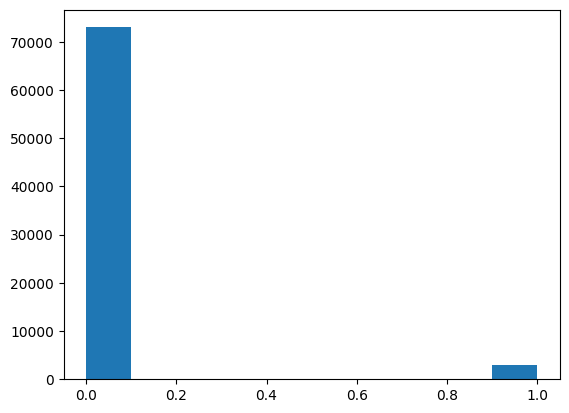

In [16]:
plt.hist(df['TARGET'])

In [19]:
df_0=df[df['TARGET']==0]
df_1=df[df['TARGET']==1]

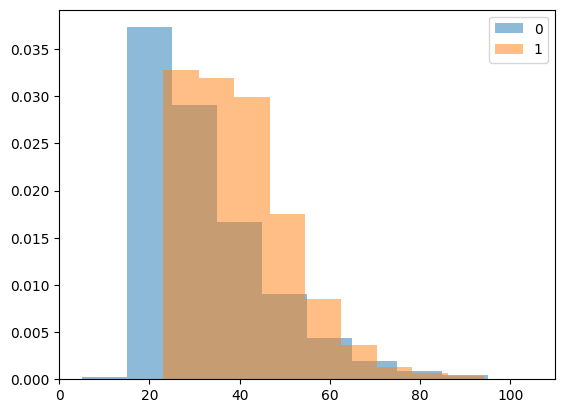

In [24]:
plt.hist(df_0['var15'], density=1, alpha=0.5, label='0')
plt.hist(df_1['var15'], density=1, alpha=0.5, label='1')
plt.legend()